# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Soil Nutrient Prediction-- Bezuidenhout Park-SA</p>

![image](thumb.png)



 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [1]:
# LIBRARIES IMPORTATION
import csv              # Import CSV module for reading and writing CSV files
import pandas as pd     # Import pandas library for data manipulation and analysis
import sqlite3          # Import sqlite3 library for SQLite database operations
#import GDAL             # Import GDAL library for geospatial data processing
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt


In [2]:
# Installing External Libraries not present
#!pip install GDAL

# Soil Nutrient Data Collection and Storage Process

## Introduction

In this section, we outline the process and nature of soil nutrient data collection for Bezuidenhout Park in South Africa. Soil nutrient values were collected for multiple points within the park, at two depths: 0-20 meters and 20-50 meters. The data collection process involved utilizing an API to gather soil nutrient measurements, which were then stored in a PostgreSQL database. The collected data includes various attributes such as ID, timestamp of update and creation, depth of measurement, latitude and longitude coordinates, measured nutrient value, date of collection, and property ID.

## Data Collection Process

1. **Study Area**: The study area for soil nutrient data collection is Bezuidenhout Park located in South Africa.

2. **Sampling Points**: Multiple sampling points within the park were identified for soil nutrient measurement. These points were selected to cover diverse soil types and land use patterns within the park.

3. **Depth of Measurement**: Soil samples were collected at two depths: 0-20 meters and 20-50 meters below the surface. This depth stratification allows for the assessment of soil nutrient distribution at different soil horizons.

4. **API Utilization**: An Application Programming Interface (API) was employed to facilitate automated data collection from soil nutrient measurement devices. The API retrieves nutrient values directly from the measurement devices installed at each sampling point.

5. **Data Storage**: The collected soil nutrient data was stored in a PostgreSQL database for efficient management and analysis. The database schema includes columns for ID, timestamp of update and creation, depth of measurement, latitude and longitude coordinates, measured nutrient value, date of collection, and property ID.

## Nature of Collected Data

- **ID**: Unique identifier for each soil nutrient measurement record.
- **Updated_at**: Timestamp indicating the last update of the record.
- **Created_at**: Timestamp indicating the creation of the record.
- **Depth**: Depth range of soil sample collection (e.g., 10-30 meters, 30-50 meters).
- **Latitude**: Geographic coordinate indicating the north-south position of the sampling point.
- **Longitude**: Geographic coordinate indicating the east-west position of the sampling point.
- **Value**: Measured soil nutrient value.
- **Date_collected**: Date when the soil sample was collected.
- **Property_id**: Identifier for the property or sampling location within Bezuidenhout Park.


## Function Documentation: sql_to_csv

The `sql_to_csv` function is a Python utility I designed to convert data recieved in Postgress SQL table into a CSV (Comma Separated Values) file. This function is particularly useful when working with SQLite kind of databases and needing to export data for analysis or sharing.

### Purpose
Hence the purpose of the `sql_to_csv` function is to facilitate the extraction of data from an SQLite table and transform it into a format that is easily accessible and shareable, such as a CSV file.

### Parameters
- `sql_file`: *str*
    - Path to the SQL file containing the SQLite database schema and data.
- `csv_file`: *str*
    - Path to the output CSV file where the extracted data will be saved.
- `table_name`: *str*
    - Name of the table from which data will be fetched.

### Functionality
1. **Database Connection**: The function establishes a connection to an in-memory SQLite database.
2. **SQL Execution**: It reads the SQL file provided and executes the SQL script within the SQLite environment. This script typically contains commands to create tables and insert data.
3. **Data Retrieval**: The function constructs a SQL query to select all records from the specified table and retrieves the queried data.
4. **DataFrame Construction**: Using the pandas library, the retrieved data is organized into a DataFrame, which represents tabular data with column names.
5. **CSV Generation**: The DataFrame is then saved to the specified CSV file, effectively converting the SQLite data into a CSV format.
6. **Cleanup**: Finally, the function ensures the proper closure of the database connection.

### Example Usage
```python
sql_to_csv('soildatasetdb.sql', 'soildatasetdb.csv', 'dataset_dataset.csv')


In [3]:
def sql_to_csv(sql_file: str, csv_file: str, table_name: str) -> None:
    """
    Converts data from a specified SQLite table to a CSV file.

    Args:
        sql_file (str): The path to the SQL file containing the SQLite database schema and data.
        csv_file (str): The path to the output CSV file where the data will be saved.
        table_name (str): The name of the table from which data will be fetched.

    Returns:
        None
    """
    # Connect to the SQLite database
    conn = sqlite3.connect(':memory:')
    cursor = conn.cursor()

    # Read SQL file and execute its content
    with open(sql_file, 'r') as f:
        sql_script = f.read()
        cursor.executescript(sql_script)

    # Fetch data from the specified table
    query = f"SELECT * FROM {table_name};"
    data = cursor.execute(query).fetchall()

    # Get column names
    column_names = [description[0] for description in cursor.description]

    # Convert data to DataFrame
    df = pd.DataFrame(data, columns=column_names)

    # Save DataFrame to CSV
    df.to_csv(csv_file, index=False)

    # Close the database connection
    conn.close()

sql_to_csv('soildatasetdb.sql', 'soildatasetdb.csv', 'dataset_dataset')


## Function Documentation: modify_csv_header

The `modify_csv_header` function is designed to help me with the modification of the header row in a CSV file. It takes three parameters: `input_csv`, `output_csv`, and `new_header`.

### Purpose
This function aims to modify the header row of a CSV file by replacing it with a new header provided as an argument. This operation is commonly performed when the original CSV file lacks descriptive column names or requires updates to its header information.

### Parameters
- `input_csv`: *str*
    - Path to the input CSV file containing the original data.
- `output_csv`: *str*
    - Path to the output CSV file where the modified content will be saved.
- `new_header`: *list*
    - A list representing the desired new header for the CSV file.

### Functionality
1. **Input CSV Reading**: The function reads the content of the input CSV file using the `csv.reader` module.
2. **Header Modification**: It replaces the first row of the CSV, which represents the header, with the new header provided as an argument.
3. **CSV Writing**: The modified content, including the updated header, is written to the output CSV file using the `csv.writer` module.
4. **Completion**: Once the writing process is completed, the function finishes execution without returning any value.

### Example Usage
```python
input_csv = "dataset_dataset.csv"
output_csv = "modified_dataset.csv"
new_header = ["id", "updated_at", "created_at", "depth", "latitude", "longitude", "value", "date_collected", "property_id"]

modify_csv_header(input_csv, output_csv, new_header)


In [ ]:
def modify_csv_header(input_csv: str, output_csv: str, new_header: list) -> None:
    """
    Modifies the header of a CSV file and writes the modified content to a new CSV file.

    Args:
        input_csv (str): The path to the input CSV file.
        output_csv (str): The path to the output CSV file where modified content will be written.
        new_header (list): A list representing the new header to be used in the output CSV.

    Returns:
        None
    """
    # Read the content of the input CSV file
    with open(input_csv, 'r', newline='') as infile:
        reader = csv.reader(infile)
        rows = list(reader)

    # Modify the header (first row) with the new header provided
    rows[0] = new_header

    # Write the modified content to the output CSV file
    with open(output_csv, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(rows)

if __name__ == "__main__":
    # Example usage
    #input_csv = "dataset_dataset.csv"
    #output_csv = "modified_dataset.csv"
    #new_header = ["id", "updated_at", "created_at", "depth", "latitude", "longitude", "value", "date_collected", "property_id"]

    #modify_csv_header(input_csv, output_csv, new_header)


In [ ]:
# At this point the selected sample points is Done

In [5]:
# read in the formatted data as csv
data=pd.read_csv("new_data.csv")

A dataset represented as a DataFrame typically consists of rows and columns, where each row corresponds to an individual data entry and each column represents a specific attribute or feature. In the context of the provided headers, the dataset encompasses diverse information relevant to spatial data collection and analysis. 

- **The 'id' column** serves as a unique identifier for each data entry, facilitating easy referencing and data manipulation. 
- **'Updated_at' and 'created_at'** denote the timestamps indicating when the data entry was last updated and initially created, respectively, providing insights into the temporal aspects of the dataset. 
- The **'depth' column** signifies the depth measurement associated with a particular data point, which can be crucial in environmental or geological studies. 
- '**Latitude' and 'longitude'** represent the geographical coordinates corresponding to the location where the data was collected, enabling spatial analysis and visualization. 
- The **'value'** column holds numerical or categorical data, capturing the measured or observed parameter at the specified location. 
- '**Date_collected**' indicates the date when the data was collected, allowing for temporal analysis and trend identification. 
- Finally, '**property_id**' serves as a reference to additional information or metadata associated with the data entry, facilitating data linkage or categorization based on specific properties or attributes. 



In [6]:
data

,id,updated_at,created_at,depth,latitude,longitude,value,date_collected,property_id
0,739df52d-6434-46f5-87f3-75101bf6cde0,2023-10-22 00:30:14.121578+00,2023-10-22 00:30:14.121584+00,20-50,-26.1849,28.0876,6.4,22/10/2023,cation_exchange_capacity
1,4d0da221-1713-4494-9494-d8ac5146aaf7,2023-10-22 00:30:14.121605+00,2023-10-22 00:30:14.121609+00,0-20,-26.1849,28.0876,1.1,22/10/2023,nitrogen_total
2,c64c4a0f-8654-4900-a82f-6e63a2e1fc60,2023-10-22 00:30:14.121627+00,2023-10-22 00:30:14.121632+00,20-50,-26.1849,28.0876,0.7,22/10/2023,nitrogen_total
3,3aaff2f1-23ea-4960-b7ba-fbe3cde05177,2023-10-22 00:30:14.12165+00,2023-10-22 00:30:14.121655+00,0-20,-26.1849,28.0876,21.2,22/10/2023,carbon_total
4,33aa3366-eda6-450b-9647-d5bde2b24296,2023-10-22 00:30:14.121676+00,2023-10-22 00:30:14.121683+00,20-50,-26.1849,28.0876,17.2,22/10/2023,carbon_total
...,...,...,...,...,...,...,...,...,...
14995,909126b9-b69a-4d93-989e-406059244b30,2023-11-05 00:32:21.63653+00,2023-11-05 00:32:21.636537+00,20-50,-26.1812,28.0897,1.0,05/11/2023,zinc_extractable
14996,efc67d15-7f47-4156-b99f-035656c5d071,2023-11-05 00:32:21.636561+00,2023-11-05 00:32:21.636568+00,0-20,-26.1812,28.0897,80.5,05/11/2023,iron_extractable
14997,4ad350c9-dae7-4439-aa4d-8c96d5fb4c53,2023-11-05 00:32:21.636593+00,2023-11-05 00:32:21.6366+00,20-50,-26.1812,28.0897,23.5,05/11/2023,iron_extractable
14998,2cd27831-6c14-4131-ac2b-a25ad70adc33,2023-11-05 00:31:53.970282+00,2023-11-05 00:31:53.970287+00,20-50,-26.1850,28.0895,0.7,05/11/2023,nitrogen_total



 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">PART 2: EXTRACTING ENVIRONMENTAL COVARIATE DATA</p>

# Soil Nutrient Prediction using Covariant Data from Landsat 8 and Sentinel-2A

## Introduction

we aim to predict soil nutrient levels using covariant data extracted from Landsat 8 and Sentinel-2A satellite imagery. Soil nutrient prediction is crucial for optimizing agricultural practices, maximizing crop yield, and minimizing environmental impact. By leveraging spectral bands and spectral indices derived from satellite imagery, we can infer valuable information about soil properties and nutrient content.

## Covariant Data Extraction

Covariant data extraction involves the collection of correlated variables or features from multiple sources. In our case, we extracted spectral bands and spectral indices from Landsat 8 and Sentinel-2A imagery to capture a comprehensive view of the study area's characteristics.

### Spectral Bands

Landsat 8 and Sentinel-2A provide multispectral imagery with bands spanning the visible, near-infrared, and shortwave infrared spectra. The median values of spectral bands acquired from both satellites were utilized for analysis. These bands include:

- Landsat 8 bands (La): B1-B7
- Sentinel-2A bands (Se): B1-B12

These bands cover a range of wavelengths that are sensitive to various soil properties, vegetation health, and atmospheric conditions.

### Spectral Indices

In addition to spectral bands, several spectral indices were derived from Landsat 8 and Sentinel-2A imagery. These indices are computed using combinations of spectral bands and are known to be indicative of specific soil properties. The indices utilized in our analysis include:

- Salinity Index (SI)
- Gypsum Index (GI)
- Carbonate Index (CAI)
- Brightness Index (BI)
- Normalized Difference Vegetation Index (NDVI)
- Clay Index (CI)
- Enhanced Vegetation Index (EVI)

These indices provide valuable insights into soil composition, vegetation vigor, and environmental stressors, which are essential for soil nutrient prediction.

## Why? Importance 

Covariant data from satellite imagery plays a crucial role in soil nutrient prediction for several reasons:

1. **Comprehensive Data**: Landsat 8 and Sentinel-2A provide multispectral imagery with high spatial resolution, enabling the capture of fine-scale soil variability.
2. **Non-Destructive Monitoring**: Satellite imagery allows for non-destructive monitoring of soil properties over large areas without the need for extensive field sampling.
3. **Temporal Monitoring**: Repeat satellite observations over time provide temporal insights into soil nutrient dynamics, allowing for the detection of seasonal variations and long-term trends.
4. **Correlation with Soil Properties**: Spectral bands and indices are correlated with various soil properties such as organic matter content, moisture levels, and nutrient concentrations, enabling indirect estimation of soil nutrient levels.
5. **Integration with Machine Learning**: Covariant data can be integrated with machine learning algorithms to develop predictive models for soil nutrient levels, enhancing precision agriculture practices and resource management.



In [ ]:
## extracting Coastal aerosol 

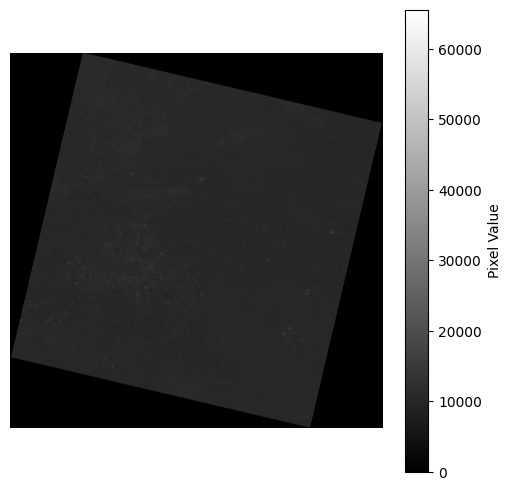

In [6]:
import rasterio
import matplotlib.pyplot as plt

file_path = "land/LC08_L1TP_170078_20231024_20231031_02_T1_B1.TIF"

with rasterio.open(file_path) as src:
    band = src.read(1)

plt.figure(figsize=(6, 6))
plt.imshow(band, cmap='gray')
plt.colorbar(label='Pixel Value')  # Add colorbar with label
plt.axis('off')  # Remove axis labels
plt.show()


In [ ]:
## Data Manipulation

In [7]:
# Open the raster file
file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B1.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate the mean of the spectral band
    band_mean = band.mean()

    # Print the mean
    print("Mean of the Coastal Aerosol band:", band_mean)


Mean of the spectral band: 7079.074094676007


In [8]:
# extracting Blue band

file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B2.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate Blue band value of spectral band
    band_mean = band.mean()

    # Print 
    print("Blue Band value the spectral band:", band_mean)


Blue Band value the spectral band: 6688.956006864573


In [9]:
# extracting Green band

file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B3.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate Blue band value of spectral band
    band_mean = band.mean()

    # Print 
    print("Green band value the spectral band:", band_mean)

Blue Band value the spectral band: 6570.883255572053


In [10]:
# extracting Red band

file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B4.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate Blue band value of spectral band
    band_mean = band.mean()

    # Print 
    print("Red Band value the spectral band:", band_mean)

Blue Band value the spectral band: 6985.361689196056


In [11]:
# etracting Near infrared & Vegetation Red Edge

file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B5.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate Blue band value of spectral band
    band_mean = band.mean()

    # Print 
    print(" Near infrared & Vegetation Red Edge value the spectral band:", band_mean)

Blue Band value the spectral band: 9839.614457824586


In [12]:
# etracting Shortwave IR-1 & Vegetation Red Edge

file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B6.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate Blue band value of spectral band
    band_mean = band.mean()

    # Print 
    print("Shortwave IR-1 & Vegetation Red Edge value the spectral band:", band_mean)

Blue Band value the spectral band: 11432.036228475627


In [13]:
# etracting Shortwave IR-2 & Vegetation Red Edge

file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B7.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate Blue band value of spectral band
    band_mean = band.mean()

    # Print 
    print("Shortwave IR-2 & Vegetation Red Edge value the spectral band:", band_mean)

Blue Band value the spectral band: 9482.945322798125


In [14]:
# extracting Near infrared & Vegetation Red Edge NIVR
file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B8.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate Blue band value of spectral band
    band_mean = band.mean()

    # Print 
    print("Near infrared & Vegetation Red Edge NIVR value the spectral band:", band_mean)

Blue Band value the spectral band: 6686.454688205089


In [15]:
# extracting Water vapour & SWIR-Cirus
file_path =  "land/LC08_L1TP_170078_20231024_20231031_02_T1_B9.TIF"
with rasterio.open(file_path) as src:
    # Read the raster band
    band = src.read(1)  # Assuming you want to read the first band

    # Calculate Blue band value of spectral band
    band_mean = band.mean()

    # Print 
    print("Water vapour & SWIR-Cirus value the spectral band:", band_mean)

Blue Band value the spectral band: 3474.7624072643603


In [18]:

#extracting Shortwave IR-1 & Shortwave IR-2 

# Open the first raster file
file_path_1 = "land/LC08_L1TP_170078_20231024_20231031_02_T1_B10.TIF"
with rasterio.open(file_path_1) as src1:
    band1 = src1.read(1)  # Assuming you want to read the first band

# Open the second raster file
file_path_2 = "land/LC08_L1TP_170078_20231024_20231031_02_T1_B11.TIF"
with rasterio.open(file_path_2) as src2:
    band2 = src2.read(1)  # Assuming you want to read the first band

# Calculate the mean of the two bands
combined_mean = (band1 + band2) / 2

# Print the mean
print("Mean of the combined Shortwave IR-1 & Shortwave IR-2 bands:", combined_mean.mean())


Mean of the combined bands: 15320.563265750676


In [7]:
# Visualizing the Digital Eleviatin Model Data
dem = rio.open("s27_e028_1arc_v3 (2).tif")
dem_array = dem.read(1).astype('float64')


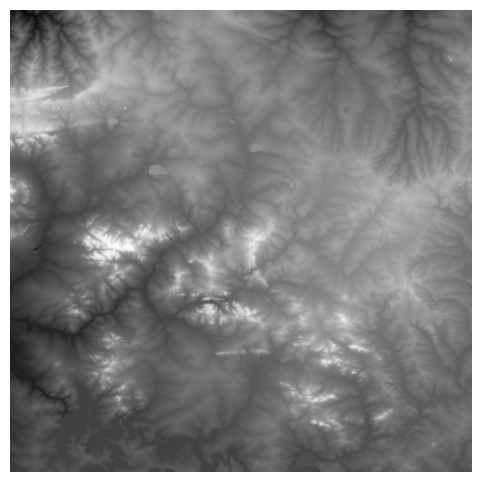

In [8]:
fig, ax = plt.subplots(1, figsize=(6, 6))
show(dem_array, cmap='Greys_r', ax=ax)
plt.axis('off')
plt.show()

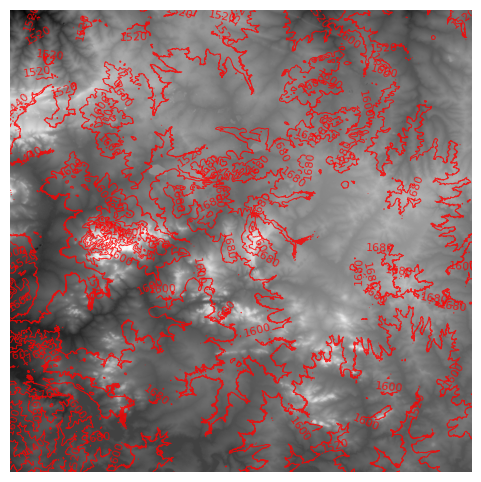

In [9]:
#To reveal the CONTOUR on the Digita Eleviation Model.
fig, ax = plt.subplots(1, figsize=(6, 6))
show(dem_array, cmap='Greys_r', ax=ax)
show(dem_array, contour=True, ax=ax, linewidths=0.7)
plt.axis("off")
plt.show()

In [18]:
full_data=pd.read_csv("OBJ1DATA.csv")
full_data

,id,updated_at,created_at,depth,latitude,longitude,value,date_collected,property_id,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12
0,739df52d-6434-46f5-87f3-75101bf6cde0,2023-10-22 00:30:14.121578+00,2023-10-22 00:30:14.121584+00,20-50,-26.1849,28.0876,6.4,22/10/2023,cation_exchange_capacity,7122.038535,6683.292714,6592.412771,7021.449850,9802.593508,11487.541673,9494.184422,6684.628050,3503.385142,15213.004704
1,4d0da221-1713-4494-9494-d8ac5146aaf7,2023-10-22 00:30:14.121605+00,2023-10-22 00:30:14.121609+00,0-20,-26.1849,28.0876,1.1,22/10/2023,nitrogen_total,7167.719830,6660.942417,6568.538446,6993.821110,9782.140850,11433.400325,9451.211783,6667.901444,3468.949106,15178.847635
2,c64c4a0f-8654-4900-a82f-6e63a2e1fc60,2023-10-22 00:30:14.121627+00,2023-10-22 00:30:14.121632+00,20-50,-26.1849,28.0876,0.7,22/10/2023,nitrogen_total,7088.185972,6686.229834,6514.304720,6972.132985,9863.026928,11649.579143,9485.020294,6642.599359,3451.540400,15498.968200
3,3aaff2f1-23ea-4960-b7ba-fbe3cde05177,2023-10-22 00:30:14.12165+00,2023-10-22 00:30:14.121655+00,0-20,-26.1849,28.0876,21.2,22/10/2023,carbon_total,7061.113204,6676.194155,6589.194825,7000.958284,9881.841947,11452.585780,9483.775573,6658.902000,3469.243733,15348.398625
4,33aa3366-eda6-450b-9647-d5bde2b24296,2023-10-22 00:30:14.121676+00,2023-10-22 00:30:14.121683+00,20-50,-26.1849,28.0876,17.2,22/10/2023,carbon_total,7006.893297,6688.815966,6568.423126,6969.163894,9907.229625,11240.011871,9454.193558,6657.734951,3492.437387,15402.203056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,909126b9-b69a-4d93-989e-406059244b30,2023-11-05 00:32:21.63653+00,2023-11-05 00:32:21.636537+00,20-50,-26.1812,28.0897,1.0,05/11/2023,zinc_extractable,7027.246423,6662.088630,6528.722206,7015.311264,9853.066359,11554.434376,9479.752067,6679.600447,3484.918452,15475.570868
14996,efc67d15-7f47-4156-b99f-035656c5d071,2023-11-05 00:32:21.636561+00,2023-11-05 00:32:21.636568+00,0-20,-26.1812,28.0897,80.5,05/11/2023,iron_extractable,7077.046201,6693.572033,6605.646662,7011.712714,9762.762822,11497.974389,9495.419435,6714.655693,3485.760689,15241.861696
14997,4ad350c9-dae7-4439-aa4d-8c96d5fb4c53,2023-11-05 00:32:21.636593+00,2023-11-05 00:32:21.6366+00,20-50,-26.1812,28.0897,23.5,05/11/2023,iron_extractable,7163.278197,6697.961305,6617.560433,6968.586831,9807.742218,11342.277081,9493.460760,6647.972029,3476.154017,15110.409372
14998,2cd27831-6c14-4131-ac2b-a25ad70adc33,2023-11-05 00:31:53.970282+00,2023-11-05 00:31:53.970287+00,20-50,-26.1850,28.0895,0.7,05/11/2023,nitrogen_total,7109.539081,6669.600119,6629.848222,7012.144412,9838.432834,11468.167633,9483.560981,6711.233609,3466.081987,15175.687701


##### Since during the training and evaluation process, evaluation will be measured per soil nutrient prediction. As shown below from the base paper **<span style="color:red">Assessing agricultural salt-affected land using digital soil mapping and hybridized random forest.pdf</span>**
![image](result.PNG)

##### the full data set will be grouped by nutrient and stored seperatly for training and evaluation as done the the code section below.


In [ ]:

# Group by 'property_id'
grouped = data.groupby('property_id')

# Iterate over groups and save each group to a CSV file
for name, group in grouped:
    group.to_csv(f'group_{name}.csv', index=False)

df_aluminium=pd.read_csv("group_aluminium_extractable.csv")
df_calcium=pd.read_csv("group_calcium_extractable.csv")
df_carbon=pd.read_csv("group_carbon_organic.csv")
df_iron=pd.read_csv("group_iron_extractable.csv")
df_nitrogen=pd.read_csv("group_nitrogen_total.csv")
df_ph=pd.read_csv("group_ph.csv")
df_phosphorus=pd.read_csv("group_phosphorous_extractable.csv")
df_sulphur=pd.read_csv("group_sulphur_extractable.csv")
df_zinc=pd.read_csv("group_zinc_extractable.csv")
df_potassium=pd.read_csv("group_potassium_extractable.csv")
df_magnesium=pd.read_csv("group_magnesium_extractable.csv")
df_exchange capacity=pd.read_csv("group_cation_exchange_capacity.csv")